## Analysis of market making feasibility on amethyst

(copy of the one in tutorial-round)

In [2]:
import tools.log_parser as log_parser
import tools.backtester as backtester
import tools.trade_analyser as trade_analyser
import sys
from datamodel import *
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dataclasses import dataclass
import math

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
LOG_PATH = "04_08_combined_trader_54cb22.log"

LIMITS = backtester.KNOWN_LIMITS

In [5]:
log = log_parser.parse_log(LOG_PATH, parse_trader_log_as_object=True)
trade_analyser.annotate_log(log)
sandbox_logs = log.sandbox_logs
activity_df = log.activity_df

In [6]:
STARFRUIT = "STARFRUIT"

Looking for a model of distribution of good bot trades

In [7]:
def calc_ema(series, alpha):
    # let's do something stupider
    cur = series.iloc[0]
    result = [cur]
    for value in series.iloc[1:]:
        cur = alpha * value + (1 - alpha) * cur
        result.append(cur)
    return pd.Series(result, index=series.index)

In [8]:
activity_df.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss',
       'position'],
      dtype='object')

In [9]:
starfruit_df = activity_df[activity_df["product"] == STARFRUIT]

C:\Users\Thien\AppData\Local\Temp\ipykernel_22572\3005488956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df["ema_0.1"] = calc_ema(starfruit_df["mid_price"], 0.1)
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\min

(50000.0, 70000.0)

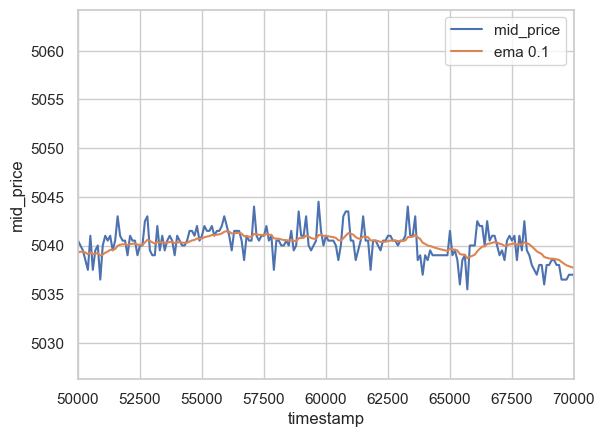

In [10]:
starfruit_df["ema_0.1"] = calc_ema(starfruit_df["mid_price"], 0.1)
sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price")
sns.lineplot(data=starfruit_df, x="timestamp", y="ema_0.1", errorbar=None, label="ema 0.1")
plt.legend()
plt.xlim(50000, 70000)

In [11]:
starfruit_df.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,position,ema_0.1
1991,0,99500,STARFRUIT,5049,20,NaN,NaN,NaN,NaN,5056,20,NaN,NaN,NaN,NaN,5052.5,565.328125,20,5054.760105
1993,0,99600,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,559.023438,20,5054.534095
1994,0,99700,STARFRUIT,5050,26,NaN,NaN,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5053.5,580.046875,20,5054.430685
1997,0,99800,STARFRUIT,5051,1,5050.0,25.0,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5054.0,586.453125,20,5054.387617
1999,0,99900,STARFRUIT,5050,28,NaN,NaN,NaN,NaN,5051,1,5057.0,28.0,NaN,NaN,5050.5,581.601562,20,5053.998855


c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

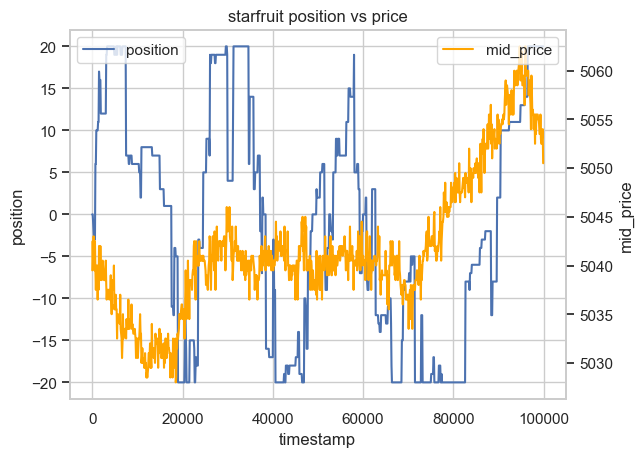

In [12]:
sns.lineplot(data=starfruit_df, x="timestamp", y="position", errorbar=None, label="position")
plt.legend(loc="upper left")
plt.title("starfruit position vs price")
ax2=plt.twinx()
sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", ax=ax2, color="orange")
ax2.grid(False)
ax2.legend(loc="upper right")

c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

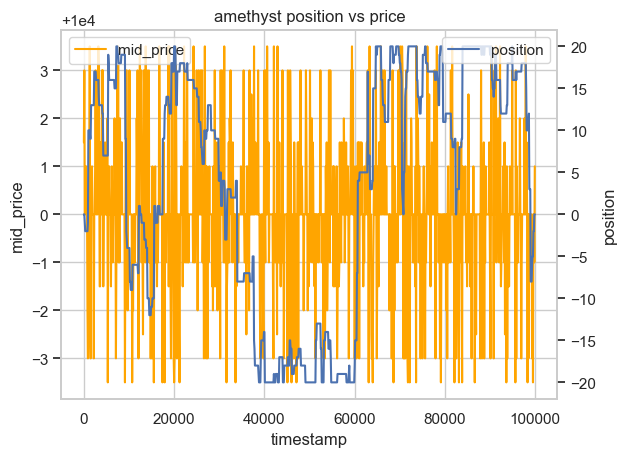

In [13]:
sns.lineplot(data=log.activity_df[log.activity_df["product"]=="AMETHYSTS"], x="timestamp", y="mid_price", errorbar=None, label="mid_price", color="orange")
plt.legend(loc="upper left")
plt.title("amethyst position vs price")
ax2=plt.twinx()
sns.lineplot(data=log.activity_df[log.activity_df["product"]=="AMETHYSTS"], x="timestamp", y="position", errorbar=None, label="position", ax=ax2)
ax2.grid(False)
ax2.legend(loc="upper right")

In [14]:
starfruit_trades_df = log.trades_df[log.trades_df.symbol==STARFRUIT]
display(starfruit_trades_df.describe(), starfruit_trades_df.head(5))

,timestamp,price,quantity,market_order_filled
count,363.000000,363.000000,363.000000,181.000000
mean,49696.143251,5041.595041,3.024793,1.618785
std,28486.158052,7.211384,3.475557,2.241894
min,100.000000,5027.000000,1.000000,0.000000
25%,24400.000000,5037.000000,1.000000,0.000000
50%,50400.000000,5040.000000,1.000000,1.000000
75%,74000.000000,5044.000000,4.000000,2.000000
max,99900.000000,5064.000000,20.000000,10.000000


,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
1,100,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,True,1.0
3,200,,SUBMISSION,STARFRUIT,SEASHELLS,5041,1,True,0.0
4,300,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,True,1.0
5,500,,,STARFRUIT,SEASHELLS,5043,1,NaN,NaN
6,600,,SUBMISSION,STARFRUIT,SEASHELLS,5041,5,True,5.0


In [15]:
own_starfruit_trades_df = starfruit_trades_df[starfruit_trades_df["submission_involved"] == True]
own_starfruit_trades_df.head()

,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
1,100,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,True,1.0
3,200,,SUBMISSION,STARFRUIT,SEASHELLS,5041,1,True,0.0
4,300,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,True,1.0
6,600,,SUBMISSION,STARFRUIT,SEASHELLS,5041,5,True,5.0
7,600,SUBMISSION,,STARFRUIT,SEASHELLS,5039,14,True,0.0


In [16]:
starfruit_buys = own_starfruit_trades_df[own_starfruit_trades_df["buyer"] == "SUBMISSION"]
starfruit_sells = own_starfruit_trades_df[own_starfruit_trades_df["seller"] == "SUBMISSION"]

In [17]:
log.trades_df.query("buyer=='SUBMISSION' and market_order_filled != 0")

,timestamp,buyer,seller,symbol,currency,price,quantity,submission_involved,market_order_filled
10,800,SUBMISSION,,STARFRUIT,SEASHELLS,5039,3,True,3.0
12,900,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,11,True,11.0
13,1200,SUBMISSION,,STARFRUIT,SEASHELLS,5037,1,True,1.0
15,1400,SUBMISSION,,STARFRUIT,SEASHELLS,5039,6,True,6.0
16,1500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,4,True,4.0
...,...,...,...,...,...,...,...,...,...
705,96900,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
712,98300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
713,98500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0
719,99300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1,True,1.0


In [18]:
def split_market_orders(trades_df: pd.DataFrame):
    trades_df = trades_df.copy()
    trades_df["limit_order_filled"] = trades_df["quantity"] - trades_df["market_order_filled"]
    trades_df = trades_df.melt(["timestamp", "buyer", "seller", "symbol", "currency", "price", "quantity"], value_vars=["limit_order_filled", "market_order_filled"], var_name="order_type", value_name="order_filled")
    trades_df = trades_df[trades_df["order_filled"] > 0]
    trades_df.sort_values("timestamp", inplace=True)
    return trades_df

starfruit_buy_market_orders = split_market_orders(starfruit_buys)
starfruit_sell_market_orders = split_market_orders(starfruit_sells)

display(starfruit_buy_market_orders.head(), starfruit_sell_market_orders.head())

,timestamp,buyer,seller,symbol,currency,price,quantity,order_type,order_filled
0,600,SUBMISSION,,STARFRUIT,SEASHELLS,5039,14,limit_order_filled,14.0
92,800,SUBMISSION,,STARFRUIT,SEASHELLS,5039,3,market_order_filled,3.0
1,800,SUBMISSION,,STARFRUIT,SEASHELLS,5038,1,limit_order_filled,1.0
93,1200,SUBMISSION,,STARFRUIT,SEASHELLS,5037,1,market_order_filled,1.0
94,1400,SUBMISSION,,STARFRUIT,SEASHELLS,5039,6,market_order_filled,6.0


,timestamp,buyer,seller,symbol,currency,price,quantity,order_type,order_filled
91,100,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,market_order_filled,1.0
1,200,,SUBMISSION,STARFRUIT,SEASHELLS,5041,1,limit_order_filled,1.0
93,300,,SUBMISSION,STARFRUIT,SEASHELLS,5042,1,market_order_filled,1.0
94,600,,SUBMISSION,STARFRUIT,SEASHELLS,5041,5,market_order_filled,5.0
95,1500,,SUBMISSION,STARFRUIT,SEASHELLS,5041,1,market_order_filled,1.0


c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='timestamp', ylabel='position'>

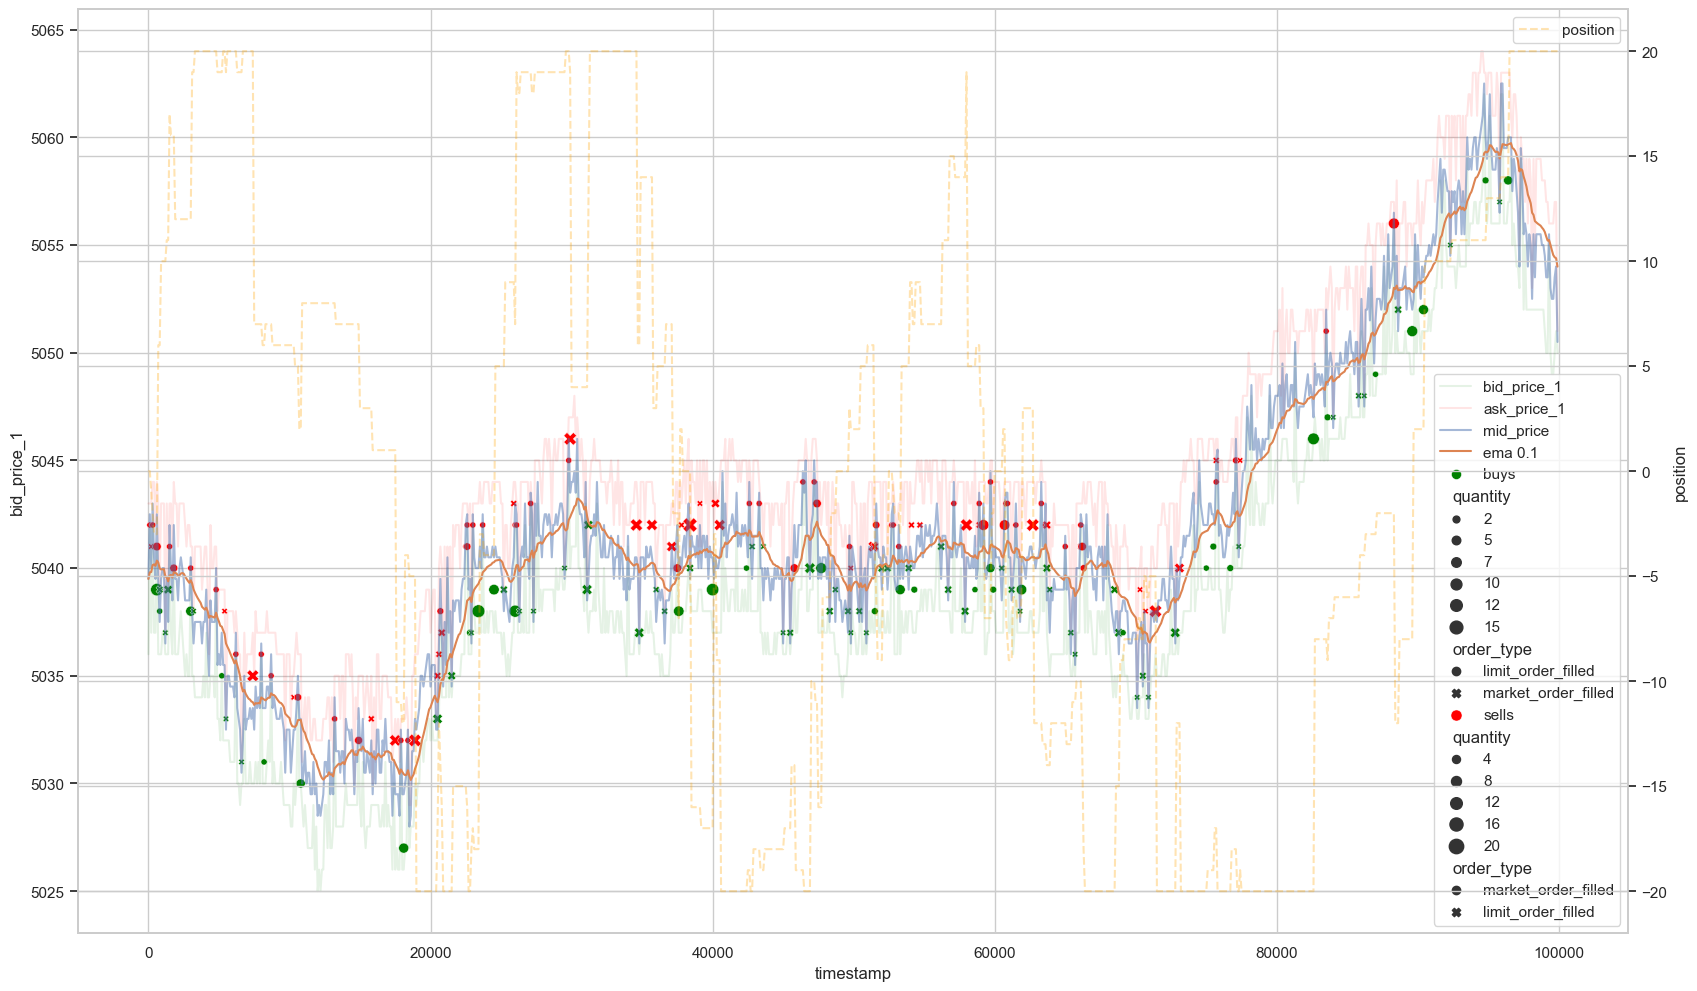

In [20]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.1, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.1, color="red")
sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.5)
sns.lineplot(data=starfruit_df, x="timestamp", y="ema_0.1", errorbar=None, label="ema 0.1")
sns.scatterplot(data=starfruit_buy_market_orders, x="timestamp", y="price", size="quantity", label="buys", color="green", style="order_type", size_norm=(0, 40), sizes=(15, 200))
sns.scatterplot(data=starfruit_sell_market_orders, x="timestamp", y="price", size="quantity", label="sells", color="red", style="order_type", size_norm=(0, 40), sizes=(15, 200))
ax2 = plt.twinx()
sns.lineplot(data=starfruit_df, x="timestamp", y="position", errorbar=None, label="position", alpha=0.3, ax=ax2, color="orange", linestyle="--")